In [21]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("temperature_data_cleaned_and_prepped.csv")

In [3]:
df["date"] = pd.to_datetime(df['date'])

In [4]:
df.drop(columns =['Unnamed: 0'], inplace=True)

In [5]:
df.head()

,date,max_temp,min_temp,avg_temp
0,1895-01-01,24.96,4.48,14.72
1,1895-02-01,27.88,2.25,15.06
2,1895-03-01,35.51,11.12,23.31
3,1895-04-01,55.49,26.22,40.86
4,1895-05-01,57.78,31.86,44.82


# Split dataframe series into seperate dataframes with the date

In [6]:
df_max = df[['date','max_temp']]
df_min = df[['date','min_temp']]
df_avg = df[['date','avg_temp']]

In [7]:
df_max = df_max.set_index('date')
df_min = df_min.set_index('date')
df_avg = df_avg.set_index('date')

# Autocorrelation Plot on df_max

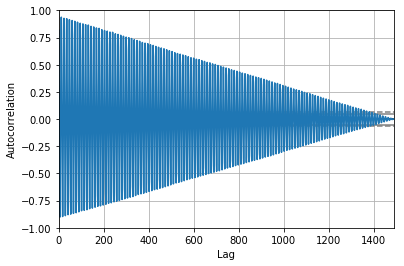

In [8]:
autocorrelation_plot(df_max)
plt.show()

# Model the residuals and lag density

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


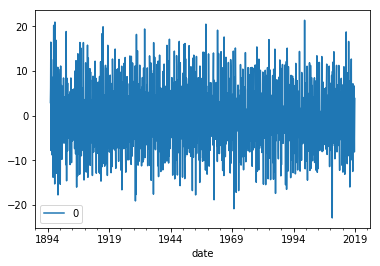

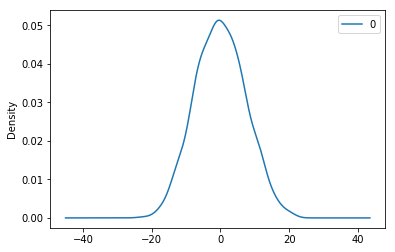

                 0
count  1487.000000
mean      0.008350
std       7.329736
min     -22.915188
25%      -5.251290
50%      -0.128049
75%       5.028870
max      21.344092


In [9]:
# fit model
model = ARIMA(df_max, order=(5,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

# Model Summary

In [10]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.max_temp   No. Observations:                 1487
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5071.290
Method:                       css-mle   S.D. of innovations              7.322
Date:                Tue, 04 Jun 2019   AIC                          10156.579
Time:                        15:19:45   BIC                          10193.711
Sample:                    02-01-1895   HQIC                         10170.418
                         - 12-01-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0055      0.167      0.033      0.973      -0.321       0.332
ar.L1.D.max_temp     0.1937      0.024      7.997      0.000       0.146       0.241
ar.L2.D.max_temp     0.3031 

# ARIMA Model

Test MSE: 49.768


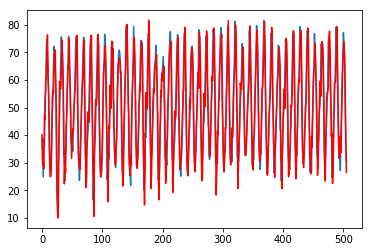

In [11]:
from sklearn.metrics import mean_squared_error

X = df_max.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Autocorrelation Plot on df_min

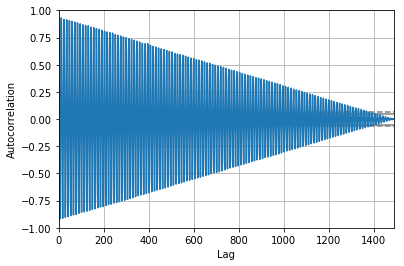

In [12]:
autocorrelation_plot(df_min)
plt.show()

# Model the residuals and lag density

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


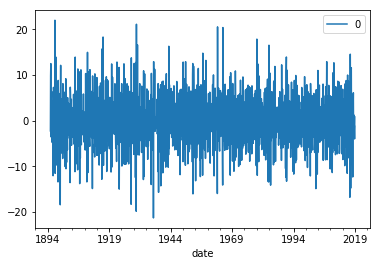

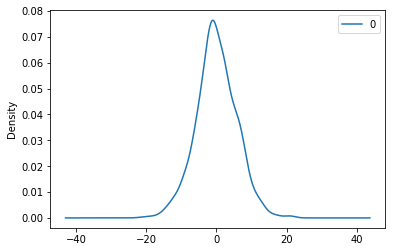

                 0
count  1487.000000
mean      0.007692
std       5.774992
min     -21.302780
25%      -3.438616
50%      -0.249388
75%       3.713689
max      22.014130


In [13]:
# fit model
model = ARIMA(df_min, order=(5,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

# Model Summary

In [14]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.min_temp   No. Observations:                 1487
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4716.512
Method:                       css-mle   S.D. of innovations              5.767
Date:                Tue, 04 Jun 2019   AIC                           9447.025
Time:                        15:21:04   BIC                           9484.156
Sample:                    02-01-1895   HQIC                          9460.864
                         - 12-01-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0038      0.123      0.031      0.975      -0.238       0.245
ar.L1.D.min_temp     0.0883      0.023      3.794      0.000       0.043       0.134
ar.L2.D.min_temp     0.3686 

# ARIMA Model

Test MSE: 29.869


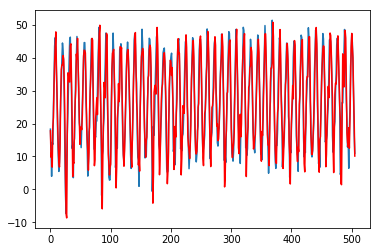

In [15]:
from sklearn.metrics import mean_squared_error

X = df_min.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Autocorrelation Plot on df_avg

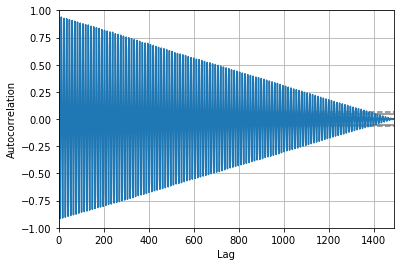

In [16]:
autocorrelation_plot(df_avg)
plt.show()

# Model the residuals and lag density

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


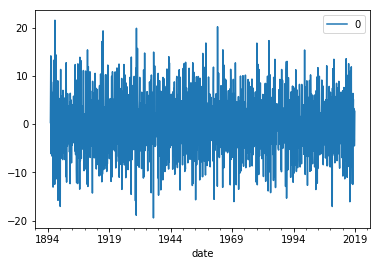

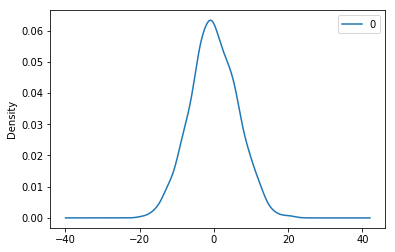

                 0
count  1487.000000
mean      0.007827
std       6.300942
min     -19.437173
25%      -4.122440
50%      -0.226908
75%       4.287001
max      21.538632


In [17]:
# fit model
model = ARIMA(df_avg, order=(5,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

# Model Summary

In [18]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.avg_temp   No. Observations:                 1487
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4846.274
Method:                       css-mle   S.D. of innovations              6.293
Date:                Tue, 04 Jun 2019   AIC                           9706.548
Time:                        15:23:08   BIC                           9743.679
Sample:                    02-01-1895   HQIC                          9720.387
                         - 12-01-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0047      0.140      0.033      0.973      -0.269       0.278
ar.L1.D.avg_temp     0.1516      0.024      6.393      0.000       0.105       0.198
ar.L2.D.avg_temp     0.3386 

# ARIMA Model

predicted=30.636794, expected=28.630000
predicted=21.836328, expected=22.140000
predicted=19.054367, expected=14.410000
predicted=17.453948, expected=26.460000
predicted=27.922598, expected=24.800000
predicted=36.351608, expected=39.180000
predicted=46.669563, expected=44.310000
predicted=55.751462, expected=57.070000
predicted=58.592483, expected=60.400000
predicted=57.444208, expected=55.580000
predicted=48.740006, expected=49.190000
predicted=38.702645, expected=40.640000
predicted=29.615965, expected=26.220000
predicted=20.385440, expected=19.020000
predicted=19.035706, expected=15.210000
predicted=18.000643, expected=18.100000
predicted=26.040596, expected=30.130000
predicted=37.373670, expected=37.220000
predicted=49.113954, expected=42.150000
predicted=53.907814, expected=52.810000
predicted=56.391904, expected=58.370000
predicted=55.680768, expected=56.300000
predicted=49.315201, expected=50.230000
predicted=38.455468, expected=41.360000
predicted=28.655824, expected=19.980000


predicted=17.468353, expected=21.720000
predicted=16.903057, expected=23.320000
predicted=24.604750, expected=18.280000
predicted=27.820529, expected=30.920000
predicted=37.531179, expected=37.380000
predicted=44.627492, expected=49.460000
predicted=53.476803, expected=55.110000
predicted=58.252702, expected=60.220000
predicted=55.655113, expected=61.700000
predicted=49.604601, expected=53.560000
predicted=39.703271, expected=37.940000
predicted=30.238436, expected=21.810000
predicted=19.560822, expected=22.620000
predicted=16.869342, expected=21.040000
predicted=23.358417, expected=26.020000
predicted=30.948460, expected=27.410000
predicted=38.781685, expected=33.310000
predicted=45.699398, expected=42.080000
predicted=53.781415, expected=51.030000
predicted=58.618919, expected=58.890000
predicted=56.539191, expected=60.850000
predicted=49.305735, expected=50.160000
predicted=38.168561, expected=35.910000
predicted=29.423087, expected=30.060000
predicted=23.703632, expected=21.900000


predicted=19.967431, expected=20.320000
predicted=23.071828, expected=16.540000
predicted=24.310772, expected=29.550000
predicted=33.876405, expected=32.850000
predicted=44.456061, expected=41.250000
predicted=52.389423, expected=51.280000
predicted=57.197602, expected=61.990000
predicted=58.854377, expected=61.290000
predicted=53.915903, expected=53.800000
predicted=41.701888, expected=42.440000
predicted=31.560082, expected=26.150000
predicted=21.112743, expected=20.480000
predicted=16.495215, expected=23.680000
predicted=22.662468, expected=21.880000
predicted=26.004526, expected=35.470000
predicted=37.512176, expected=40.890000
predicted=48.753071, expected=44.670000
predicted=56.310072, expected=55.600000
predicted=60.393090, expected=64.260000
predicted=60.291118, expected=61.480000
predicted=52.875336, expected=53.920000
predicted=40.882563, expected=38.300000
predicted=29.093742, expected=31.620000
predicted=24.214151, expected=20.250000
predicted=20.505914, expected=19.960000


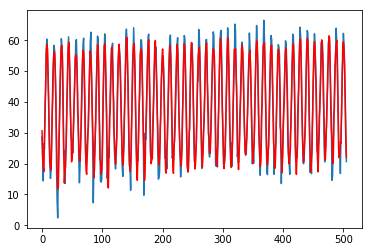

In [29]:
from sklearn.metrics import mean_squared_error

X = df_avg.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Try something Else but still use ARIMA

In [41]:
aggregation = "mean"

df_avg_2000 = df_avg['2000':].resample("M").agg(aggregation)

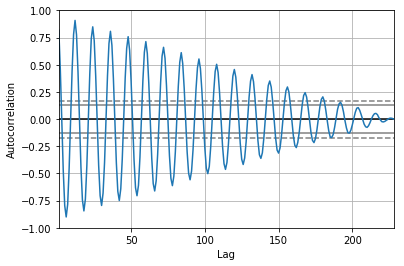

In [42]:
autocorrelation_plot(df_avg_2000)
plt.show()

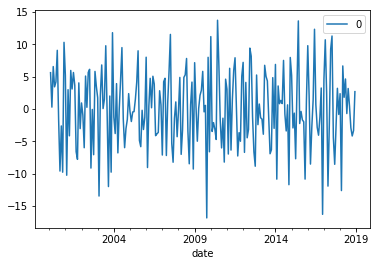

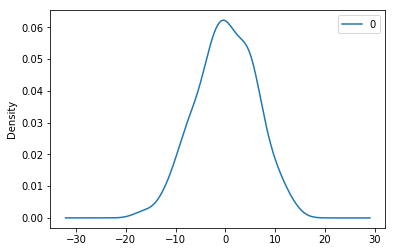

                0
count  227.000000
mean     0.055093
std      5.913398
min    -16.836723
25%     -3.719889
50%      0.109163
75%      4.554676
max     13.737283


In [45]:
# fit model
model = ARIMA(df_avg_2000, order=(5,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

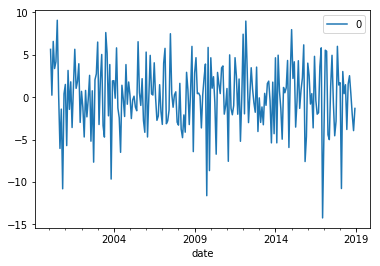

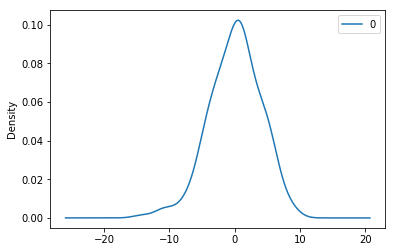

                0
count  227.000000
mean     0.076015
std      3.946375
min    -14.233598
25%     -2.370914
50%      0.382268
75%      2.628028
max      9.081104


In [46]:
# fit model
model = ARIMA(df_avg_2000, order=(10,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

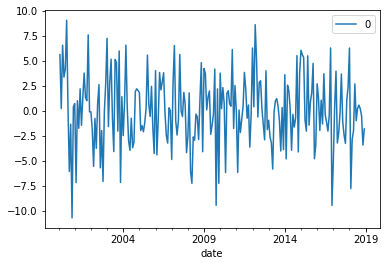

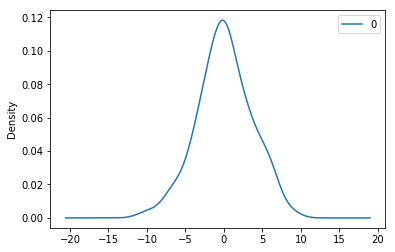

                0
count  227.000000
mean     0.067756
std      3.551003
min    -10.678896
25%     -2.001618
50%      0.036440
75%      2.289199
max      9.085718


In [52]:
# fit model
model = ARIMA(df_avg_2000, order=(15,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

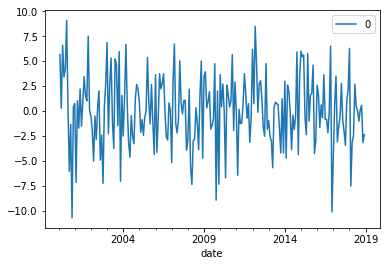

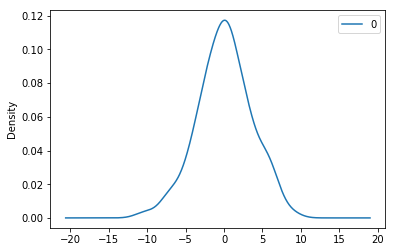

                0
count  227.000000
mean     0.065495
std      3.526141
min    -10.701961
25%     -2.184354
50%      0.111414
75%      2.398916
max      9.098279


In [53]:
# fit model
model = ARIMA(df_avg_2000, order=(20,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [54]:
# fit model
model = ARIMA(df_avg_2000, order=(5,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# residuals.plot(kind='kde')
# plt.show()
print(residuals.describe())

                0
count  227.000000
mean     0.055093
std      5.913398
min    -16.836723
25%     -3.719889
50%      0.109163
75%      4.554676
max     13.737283


In [55]:
# fit model
model = ARIMA(df_avg_2000, order=(10,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# residuals.plot(kind='kde')
# plt.show()
print(residuals.describe())

                0
count  227.000000
mean     0.076015
std      3.946375
min    -14.233598
25%     -2.370914
50%      0.382268
75%      2.628028
max      9.081104


In [56]:
# fit model
model = ARIMA(df_avg_2000, order=(15,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# residuals.plot(kind='kde')
# plt.show()
print(residuals.describe())

                0
count  227.000000
mean     0.067756
std      3.551003
min    -10.678896
25%     -2.001618
50%      0.036440
75%      2.289199
max      9.085718


In [57]:
# fit model
model = ARIMA(df_avg_2000, order=(20,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# residuals.plot(kind='kde')
# plt.show()
print(residuals.describe())

                0
count  227.000000
mean     0.065495
std      3.526141
min    -10.701961
25%     -2.184354
50%      0.111414
75%      2.398916
max      9.098279
